<a href="https://colab.research.google.com/github/vash4/My-Project/blob/master/Copy_of_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRIP- The Sparks Foundation--Data Science & Business Analystics Inter- Task-4 Decision Tree classifier and visualize it graphically.

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
# Installing Packages 
install.packages("dplyr") 
install.packages("party")  
install.packages("rpart")  
install.packages("rpart.plot")


In [ ]:
%%R
# Upload library
library(dplyr)
library(party) # decision tree
library(rpart)
library(rpart.plot)


In [ ]:
%%R
# Loading data 
#iris <- readline("https://bit.ly//3kXTdox") 
data(iris)
str(iris)
summary(iris)




'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                


In [ ]:
%%R
set.seed(1234)
pd <- sample( 2, nrow(iris),replace = TRUE, prob = c(0.8,0.2))
train <- iris[pd==1,]
test <- iris[pd==2,]
summary(pd)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    1.00    1.18    1.00    2.00 


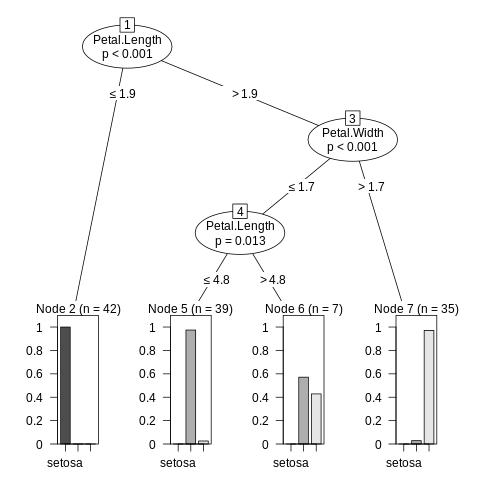

In [ ]:
%%R
# decision tree with party
tree <- ctree(Species ~ ., data = train )
tree
plot(tree)


In [ ]:
%%R
# predict
predict(tree,train,type = 'prob')

    setosa versicolor  virginica
1        1 0.00000000 0.00000000
2        1 0.00000000 0.00000000
3        1 0.00000000 0.00000000
4        1 0.00000000 0.00000000
6        1 0.00000000 0.00000000
7        1 0.00000000 0.00000000
8        1 0.00000000 0.00000000
9        1 0.00000000 0.00000000
10       1 0.00000000 0.00000000
11       1 0.00000000 0.00000000
12       1 0.00000000 0.00000000
13       1 0.00000000 0.00000000
15       1 0.00000000 0.00000000
17       1 0.00000000 0.00000000
18       1 0.00000000 0.00000000
19       1 0.00000000 0.00000000
20       1 0.00000000 0.00000000
21       1 0.00000000 0.00000000
22       1 0.00000000 0.00000000
23       1 0.00000000 0.00000000
24       1 0.00000000 0.00000000
25       1 0.00000000 0.00000000
27       1 0.00000000 0.00000000
30       1 0.00000000 0.00000000
31       1 0.00000000 0.00000000
32       1 0.00000000 0.00000000
33       1 0.00000000 0.00000000
34       1 0.00000000 0.00000000
35       1 0.00000000 0.00000000
36       1

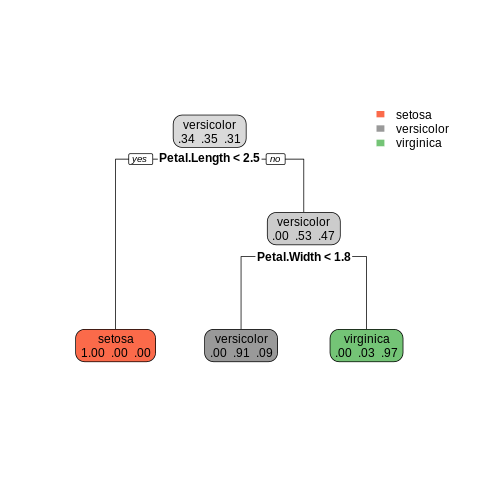

In [ ]:
%%R
# Decision tree with rpart
tree1 <- rpart(Species ~ ., train)
rpart.plot(tree1,extra=4)

In [ ]:
%%R
# Misclassification error - train data
p1 <- predict(tree, train)
tab1 <- table(p1,train$Species)
tab1


            
p1           setosa versicolor virginica
  setosa         42          0         0
  versicolor      0         42         4
  virginica       0          1        34


In [ ]:
%%R
# Misclassification error - test data
p2 <- predict(tree, test)
tab2 <- table(p2,test$Species)
tab2


            
p2           setosa versicolor virginica
  setosa          8          0         0
  versicolor      0          7         1
  virginica       0          0        11
